In [16]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
using Plots

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
nucleations = [(time=0., site=Point3(0., 0., -d / 2)), (time=0., site=Point3(0., 0., d / 2))]
η_max = 15.
ηs = LinRange(0.5, η_max, 30) |> collect
snapshot = BubblesSnapShot(nucleations, η_max)

BubblesSnapShot(@NamedTuple{time::Float64, site::Point3}[(time = 0.0, site = Point3([0.0, 0.0, -1.2])), (time = 0.0, site = Point3([0.0, 0.0, 1.2]))], 15.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)

# Setting up the Ks

In [9]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 100)
k_vecs = (x -> Vec3(0., 0., x)).(ks)

100-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.39269908169872414]
 [0.0, 0.0, 0.5890486225480862]
 [0.0, 0.0, 0.7853981633974483]
 [0.0, 0.0, 0.9817477042468105]
 [0.0, 0.0, 1.1780972450961724]
 [0.0, 0.0, 1.3744467859455345]
 [0.0, 0.0, 1.5707963267948966]
 [0.0, 0.0, 1.7671458676442588]
 [0.0, 0.0, 1.9634954084936207]
 ⋮
 [0.0, 0.0, 18.064157758141313]
 [0.0, 0.0, 18.260507298990674]
 [0.0, 0.0, 18.456856839840036]
 [0.0, 0.0, 18.653206380689397]
 [0.0, 0.0, 18.84955592153876]
 [0.0, 0.0, 19.04590546238812]
 [0.0, 0.0, 19.242255003237485]
 [0.0, 0.0, 19.438604544086846]
 [0.0, 0.0, 19.634954084936208]

In [10]:
k_0

1.9634954084936207

In [11]:
ks

100-element LinRange{Float64, Int64}:
 0.19635, 0.392699, 0.589049, 0.785398, …, 19.0459, 19.2423, 19.4386, 19.635

# numerical computation

In [12]:
import EnvelopeApproximation.GravitationalPotentials: ψ as _ψ
ψ = _ψ(k_vecs, snapshot, ηs, 50, 50; rtol=1e-3)

30×100 Matrix{ComplexF64}:
       0.0+0.0im          …           0.0+0.0im
   9.54612-1.6345e-15im      -2.35748e-16+1.26357e-17im
   63.1108-9.18278e-15im          0.14602+1.15114e-16im
   231.511-3.14763e-14im         0.556774+1.21563e-15im
   631.023-7.05084e-14im         0.667493-6.37779e-12im
   1431.35-1.17977e-13im  …       1.00628-2.55237e-11im
   2863.28-1.73026e-13im          1.38694-5.10661e-11im
   5222.62-2.38549e-13im          1.99011-7.6626e-11im
   8872.57-2.99713e-13im          2.98368-5.79376e-10im
   14244.5-3.43263e-13im          3.61465-2.03652e-9im
          ⋮               ⋱  
 4.30395e5+1.4847e-12im           15.6912-1.29744e-9im
  5.1256e5+2.50726e-12im          18.4888+1.89774e-10im
 6.03802e5+3.91549e-12im          18.9609+1.67614e-9im
  7.0403e5+5.76694e-12im          23.3488+3.16173e-9im
 8.12962e5+8.0733e-12im   …       23.9226+4.64639e-9im
 9.30113e5+1.08969e-11im           28.689+6.13046e-9im
 1.05478e6+1.42136e-11im          29.6258+7.61544e-9im
 1.1860

In [18]:
p = plot(ηs, ψ[end, :] .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)

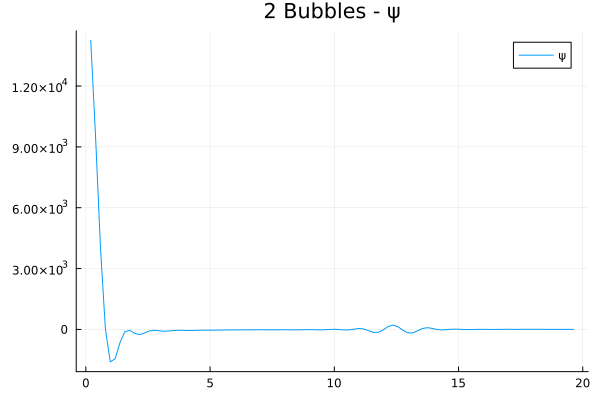

In [28]:
p = plot(norm.(ks), ψ[10, :] .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)

In [ ]:
i0 = 5

for i in i0:5:30

end

# Saving the data

In [31]:
using JLD2
data = Dict("ks" => k_vecs, "ηs" => ηs, "ψ" => _ψ)

jldsave("gravitational_potential_varying_k_varying_eta.json"; ψ_data = data)